# Obter base de dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
dados = pd.read_csv('/content/base-alugueis-sp.csv')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


#Análise Descritiva - parte 1

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [ ]:
dados.duplicated().sum()

0

In [ ]:
dados.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [ ]:
dados.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


#Importação e Limpeza

In [ ]:
qtd = dados['type'].value_counts()
repeated_values = qtd[qtd > 1]
print(repeated_values)

type
Apartamento           7187
Casa                  2841
Studio e Kitnet       1388
Casa em condomínio     241
Name: count, dtype: int64


'Studio e kitnet' e 'Studio e Kitnet' juntando em um único valor

In [ ]:
dados['type'] = dados['type'].str.replace('kitnet', 'Kitnet')

Outliers encontrados: 95       209
100      209
200      350
284      200
291      184
        ... 
11647    300
11648    235
11649    237
11650    360
11653    350
Name: area, Length: 1063, dtype: int64


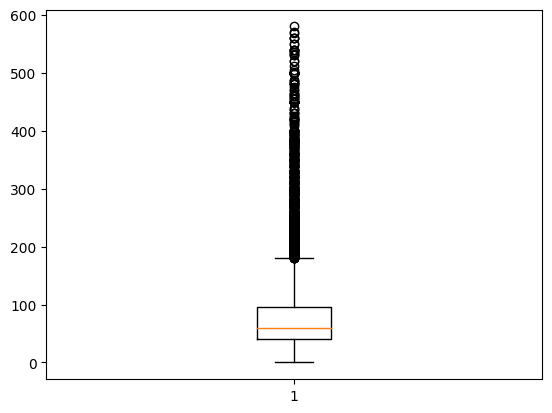

In [ ]:
# Criação do boxplot
fig, ax = plt.subplots()
ax.boxplot(dados['area'])

# Identificação dos outliers
outliers = dados.area[(dados.area < np.percentile(dados.area, 25) - (1.5 * (np.percentile(dados.area, 75) - np.percentile(dados.area, 25)))) |
                (dados.area > np.percentile(dados.area, 75) + (1.5 * (np.percentile(dados.area, 75) - np.percentile(dados.area, 25))))]

print("Outliers encontrados:", outliers)

In [ ]:
dados.shape

(11657, 8)

In [ ]:
Q1 = dados['area'].quantile(.25)
Q3 = dados['area'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR


In [ ]:
outliers_area_index = (dados['area'] < limite_inferior) | (dados['area'] > limite_superior)
dados[outliers_area_index]['area']

95       209
100      209
200      350
284      200
291      184
        ... 
11647    300
11648    235
11649    237
11650    360
11653    350
Name: area, Length: 1063, dtype: int64

In [ ]:
dados.query('area == 0')

,address,district,area,bedrooms,garage,type,rent,total
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


##Analisando os valores de aluguéis de apartamentos do mesmo bairro, onde foi encontrado valor de área incomum.

In [ ]:
ap_jardim = dados.query('type == "Apartamento" & district == "Jardim das Laranjeiras" & address == "Rua Relíquia"')
ap_jardim

,address,district,area,bedrooms,garage,type,rent,total
1849,Rua Relíquia,Jardim das Laranjeiras,69,2,1,Apartamento,1700,2581
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
3056,Rua Relíquia,Jardim das Laranjeiras,53,2,1,Apartamento,2600,3300


## Substituir valor de área  = 0, pela média

In [ ]:
media = (69 + 53)/2
dados['area'] = dados.apply(lambda x: media if (x['area'] == 0) and (x['district'] == "Jardim das Laranjeiras") else x['area'], axis=1)
dados.query('type == "Apartamento" & district == "Jardim das Laranjeiras" & address == "Rua Relíquia"')

,address,district,area,bedrooms,garage,type,rent,total
1849,Rua Relíquia,Jardim das Laranjeiras,69.0,2,1,Apartamento,1700,2581
2983,Rua Relíquia,Jardim das Laranjeiras,61.0,2,1,Apartamento,1600,2569
3056,Rua Relíquia,Jardim das Laranjeiras,53.0,2,1,Apartamento,2600,3300


In [ ]:
casa_morumbi = dados.query('type == "Casa" & ((district == "Morumbi") or address == "Rua Edmundo de Amicis")')
casa_morumbi

,address,district,area,bedrooms,garage,type,rent,total
7085,Rua Edmundo de Amicis,Morumbi,0.0,3,2,Casa,3200,3351
9389,Avenida Giovanni Gronchi,Morumbi,310.0,5,6,Casa,12470,13790
9426,Rua Wagih Assad Abdalla,Morumbi,380.0,5,3,Casa,7300,8610


In [ ]:
media = casa_morumbi['area'].mean()
dados['area'] = dados.apply(lambda x: media if (x['area'] == 0) and (x['district'] == "Morumbi") else x['area'], axis=1)
dados.query('type == "Casa" & ((district == "Morumbi") or address == "Rua Edmundo de Amicis")')

,address,district,area,bedrooms,garage,type,rent,total
7085,Rua Edmundo de Amicis,Morumbi,230.0,3,2,Casa,3200,3351
9389,Avenida Giovanni Gronchi,Morumbi,310.0,5,6,Casa,12470,13790
9426,Rua Wagih Assad Abdalla,Morumbi,380.0,5,3,Casa,7300,8610


In [ ]:
dados.loc[(dados['bedrooms'] == 0) & (dados['type'] == 'Apartamento'), 'type'] = 'Studio e Kitnet'
dados.query('bedrooms == 0 and type == "Apartamento"')

,address,district,area,bedrooms,garage,type,rent,total


In [ ]:
dados.query('type == "Casa" and bedrooms == 0')

,address,district,area,bedrooms,garage,type,rent,total
1596,Rua Marilândia,Freguesia do Ó,70.0,0,0,Casa,3100,3152
9501,Rua Dom Armando Lombardi,Vila Progredior,250.0,0,3,Casa,10000,10290
10062,Rua Graúna,Vila Uberabinha,141.0,0,0,Casa,7000,7208
10082,Rua Conde de Porto Alegre,Campo Belo,200.0,0,4,Casa,12500,12790


In [ ]:
media_quartos = dados.query('type == "Casa" and rent > 3000 and rent<7000')
media_quartos = media_quartos['bedrooms'].mean()
media_quartos

3.0396912899669237

In [ ]:
dados.loc[(dados['type'] == 'Casa') & (dados['rent'] > 3000) & (dados['rent'] < 7000) & (dados['bedrooms'] == 0), 'bedrooms'] = round(media_quartos)
dados.query('type == "Casa" and bedrooms == 0')

,address,district,area,bedrooms,garage,type,rent,total
9501,Rua Dom Armando Lombardi,Vila Progredior,250.0,0,3,Casa,10000,10290
10062,Rua Graúna,Vila Uberabinha,141.0,0,0,Casa,7000,7208
10082,Rua Conde de Porto Alegre,Campo Belo,200.0,0,4,Casa,12500,12790


In [ ]:
media_quartos = dados.query('type == "Casa" and rent > 7000 and rent<10000')
media_quartos = media_quartos['bedrooms'].mean()
media_quartos

3.6266666666666665

In [ ]:
dados.loc[(dados['type'] == 'Casa') & (dados['rent'] >= 7000) & (dados['rent'] < 10000) & (dados['bedrooms'] == 0), 'bedrooms'] = round(media_quartos)
dados.query('type == "Casa" and bedrooms == 0')

,address,district,area,bedrooms,garage,type,rent,total
9501,Rua Dom Armando Lombardi,Vila Progredior,250.0,0,3,Casa,10000,10290
10082,Rua Conde de Porto Alegre,Campo Belo,200.0,0,4,Casa,12500,12790


In [ ]:
media_quartos = dados.query('type == "Casa" and rent > 10000 and rent<12500')
media_quartos = media_quartos['bedrooms'].mean()
media_quartos

4.0

In [ ]:
dados.loc[(dados['type'] == 'Casa') & (dados['rent'] >= 10000) & (dados['rent'] < 12500) & (dados['bedrooms'] == 0), 'bedrooms'] = round(media_quartos)
dados.query('type == "Casa" and bedrooms == 0')
valor = dados.loc[10082]
valor

address     Rua Conde de Porto Alegre
district                   Campo Belo
area                            200.0
bedrooms                            0
garage                              4
type                             Casa
rent                            12500
total                           12790
Name: 10082, dtype: object

In [ ]:
media_quartos = dados.query('type == "Casa" and rent > 12500')
media_quartos = media_quartos['bedrooms'].mean()
media_quartos

3.8392857142857144

In [ ]:
dados.loc[(dados['type'] == 'Casa') & (dados['rent'] >= 12500) & (dados['bedrooms'] == 0), 'bedrooms'] = round(media_quartos)
dados.query('type == "Casa" and bedrooms == 0')

,address,district,area,bedrooms,garage,type,rent,total


<Axes: xlabel='bedrooms'>

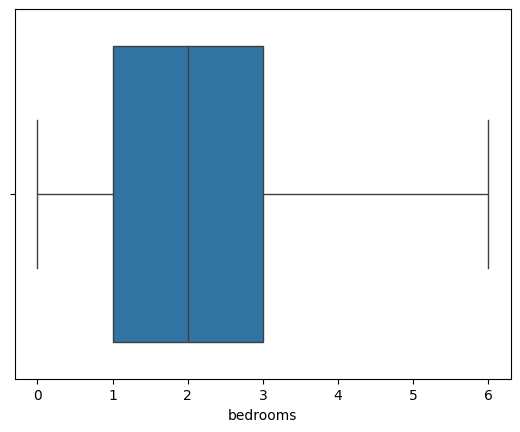

In [ ]:
sns.boxplot(x=dados['bedrooms'])

##Visualizando dados com outliers em aluguel

<Axes: xlabel='rent'>

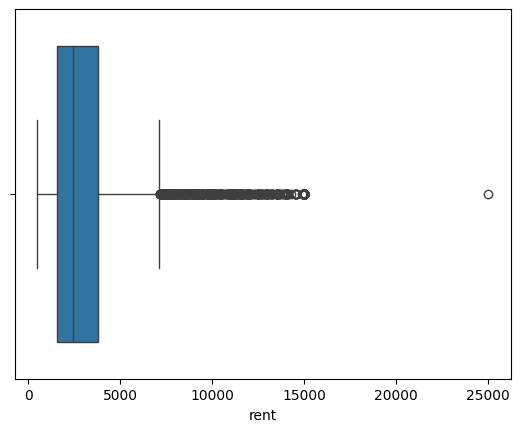

In [ ]:
sns.boxplot(x=dados['rent'])

In [ ]:
dados.query('rent >= 25000')

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24.0,1,0,Studio e Kitnet,25000,26710


In [ ]:
media_aluguel = dados.query('district == "Planalto Paulista" & bedrooms == 1 & type == "Studio e kitnet" & rent < 25000')
media_aluguel = media_aluguel['rent'].mean()
media_aluguel

nan

<Axes: xlabel='rent'>

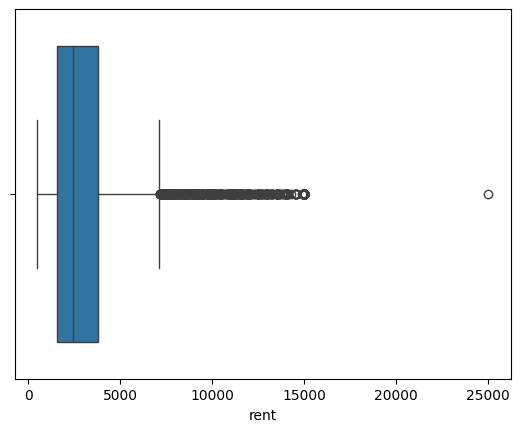

In [ ]:
sns.boxplot(x=dados['rent'])

<Axes: xlabel='total'>

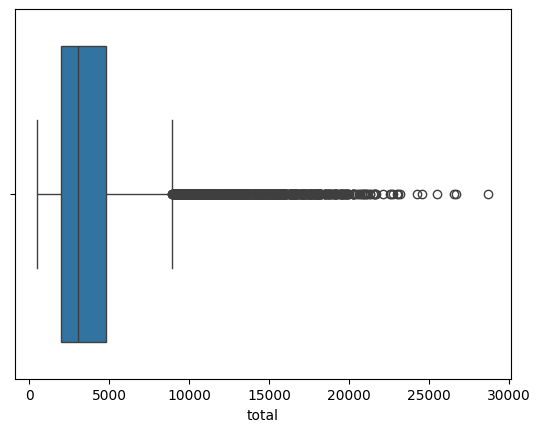

In [ ]:
sns.boxplot(x=dados['total'])

In [ ]:
dados['total'].max()
dados.query('total >= 20000 and type == "Studio e kitnet"')

,address,district,area,bedrooms,garage,type,rent,total


In [ ]:
media_total = dados.query('district == "Planalto Paulista" & bedrooms == 1 & type == "Studio e kitnet" & area > 14 & total < 25000')
media_total = media_total['total'].mean()
media_total

nan

In [ ]:
dados.query('total >= 20000 and area < 200')

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24.0,1,0,Studio e Kitnet,25000,26710
11333,Alameda Ministro Rocha Azevedo,Jardim Paulista,180.0,3,4,Apartamento,15000,22540


##Outliers em garagem

<Axes: xlabel='garage'>

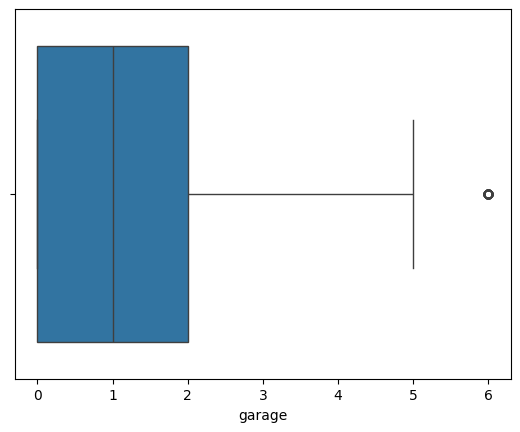

In [ ]:
sns.boxplot(x=dados['garage'])

In [ ]:
dados.query('garage == 6 and total < 10000')

,address,district,area,bedrooms,garage,type,rent,total
547,Rua São Francisco de Assis,Vila Mangalot,223.0,3,6,Casa,4100,4518
556,Rua Domingos Portela,Jardim das Vertentes,207.0,3,6,Casa,5500,5834
1030,Rua Flamengo,Chácara Califórnia,112.0,3,6,Casa,4500,5233
2297,Rua Soldado João de Oliveira,Chácara Inglesa,232.0,4,6,Casa,3000,3513
4664,Rua Condessa do Pinhal,Parque Colonial,180.0,3,6,Casa,8500,8945
5345,Rua Clélia,Vila Pires,272.0,3,6,Casa,4100,4374
6931,Rua Teofrasto,Vila Olinda,234.0,3,6,Casa,4310,4493
6942,Rua Cipriano Barata,Ipiranga,199.0,3,6,Casa,6065,6739
7983,Rua dos Poetas Guarulhenses,Jardim Las Vegas,101.0,3,6,Casa,2800,2966
8561,Rua José Mariano Filho,Jardim Oriental,180.0,3,6,Casa,3860,4175


#Análise Descritiva - Parte 2

##Histogramas

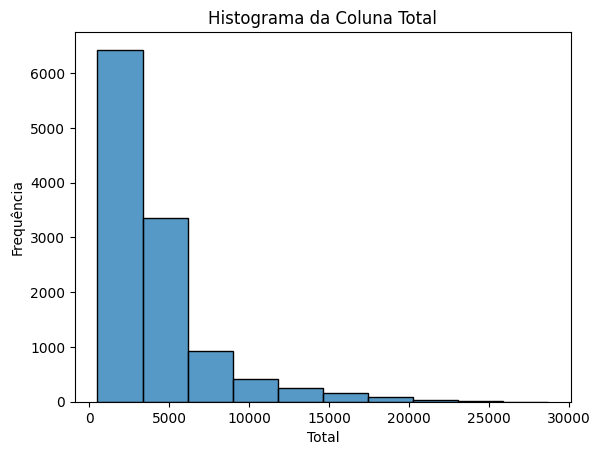

In [ ]:
sns.histplot(dados['total'], bins=10, kde=False)
plt.title('Histograma da Coluna Total')
plt.xlabel('Total')
plt.ylabel('Frequência')
plt.show()

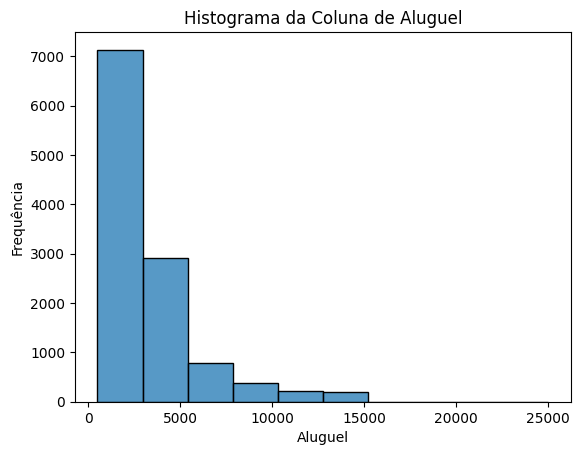

In [ ]:
sns.histplot(dados['rent'], bins=10, kde=False)
plt.title('Histograma da Coluna de Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Frequência')
plt.show()

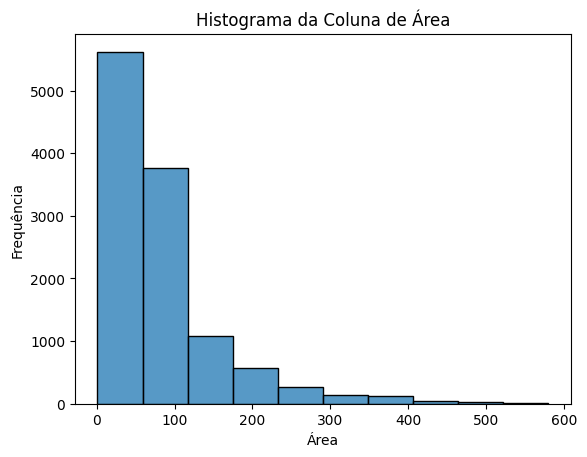

In [ ]:
sns.histplot(dados['area'], bins=10, kde=False)
plt.title('Histograma da Coluna de Área')
plt.xlabel('Área')
plt.ylabel('Frequência')
plt.show()

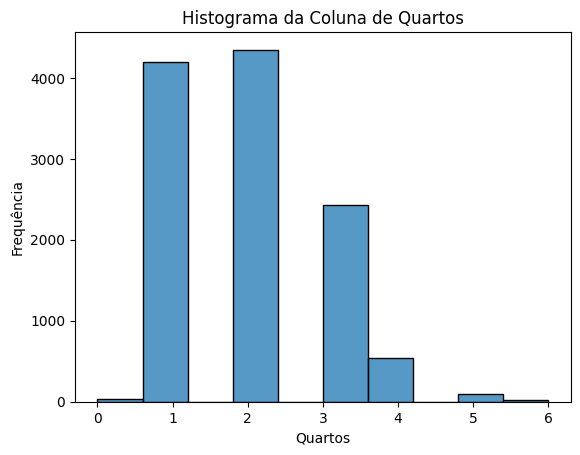

In [ ]:
sns.histplot(dados['bedrooms'], bins=10, kde=False)
plt.title('Histograma da Coluna de Quartos')
plt.xlabel('Quartos')
plt.ylabel('Frequência')
plt.show()

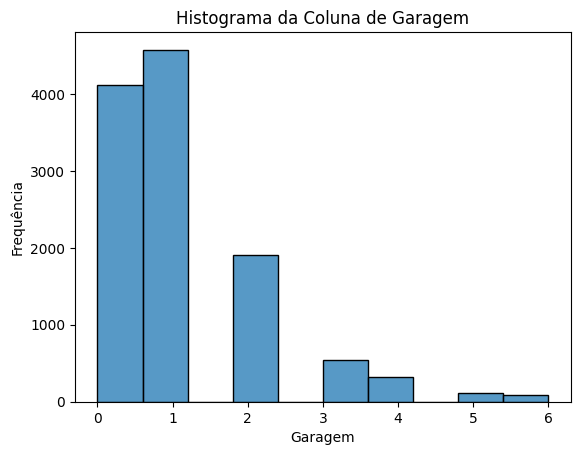

In [ ]:
sns.histplot(dados['garage'], bins=10, kde=False)
plt.title('Histograma da Coluna de Garagem')
plt.xlabel('Garagem')
plt.ylabel('Frequência')
plt.show()

##Colunas categóricas

In [ ]:
categorical_columns = ['type', 'address', 'district']
for col in categorical_columns:
    print(f"Contagem de valores para {col}:")
    print(dados[col].value_counts())
    print("\n")

Contagem de valores para type:
type
Apartamento           7187
Casa                  2841
Studio e Kitnet       1388
Casa em condomínio     241
Name: count, dtype: int64


Contagem de valores para address:
address
Rua da Consolação                      49
Rua Bela Cintra                        47
Avenida Brigadeiro Luís Antônio        36
Avenida Ipiranga                       32
Avenida Nove de Julho                  29
                                       ..
Rua Passo da Pátria                     1
Rua Teixeira Leite                      1
Avenida Professor Abraão de Morais      1
Rua Doutor Joaquim D'aquino Fonseca     1
Rua Abílio Borin                        1
Name: count, Length: 5348, dtype: int64


Contagem de valores para district:
district
Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim

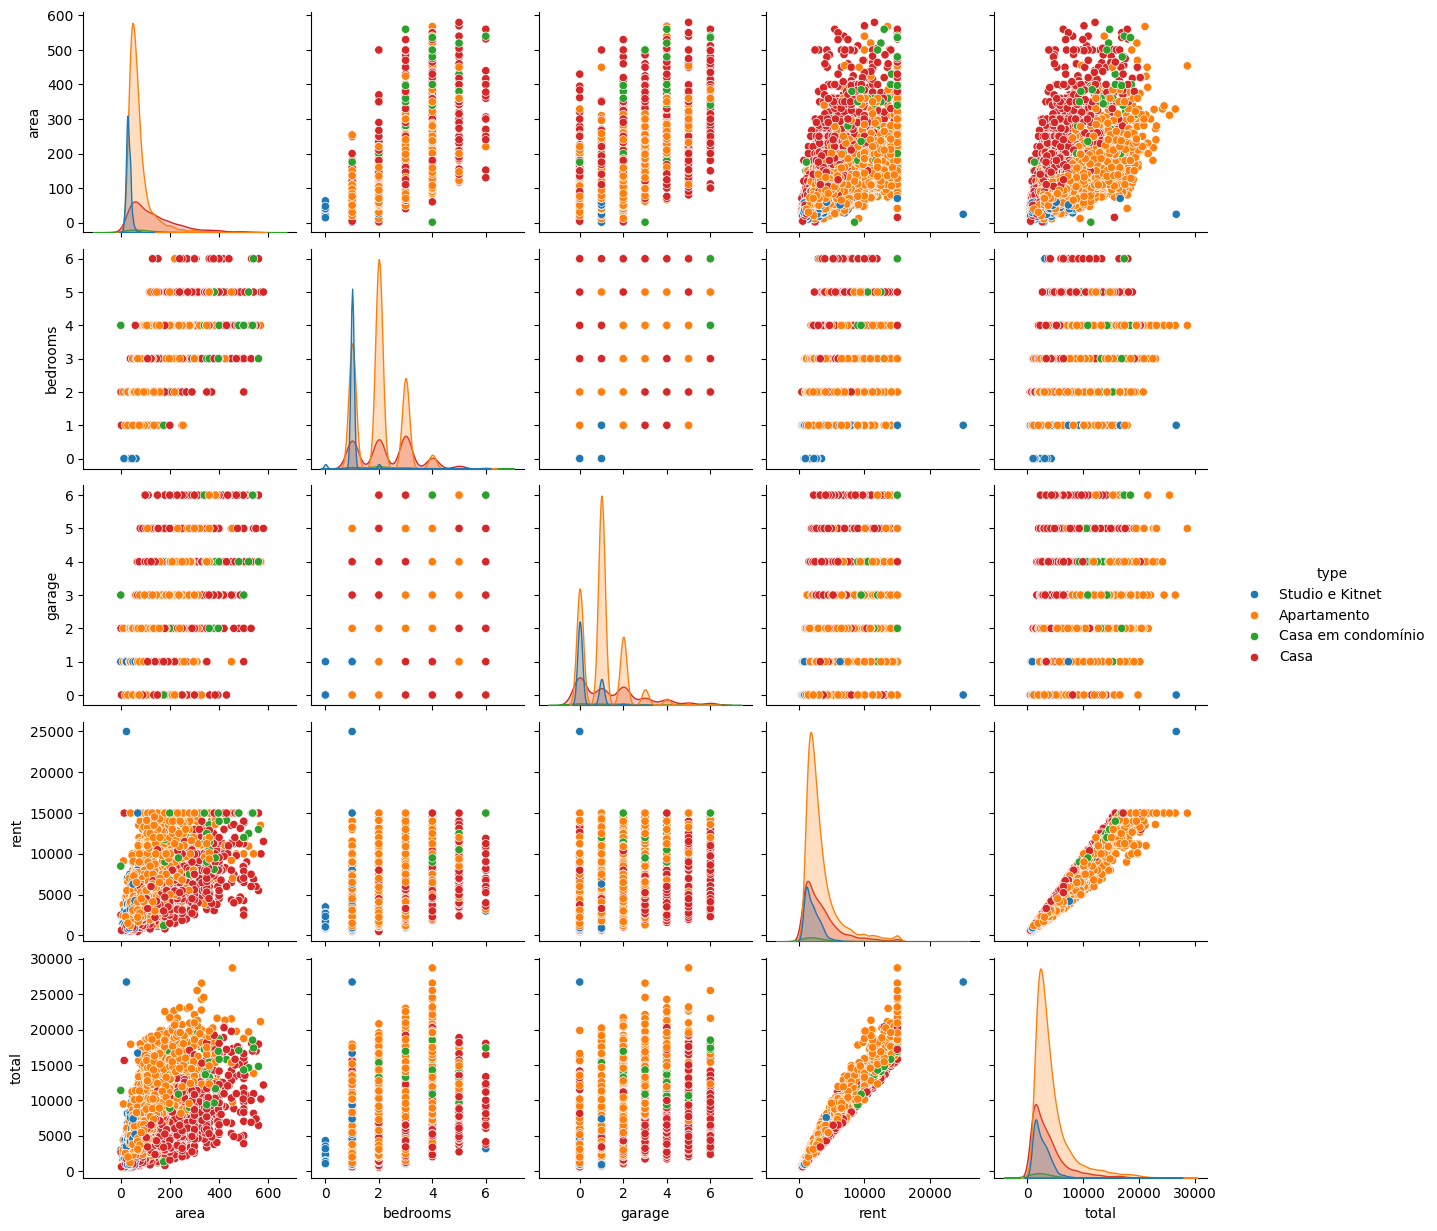

In [ ]:
sns.pairplot(dados, hue='type')
plt.show()

##Matriz de correlação

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_df = dados.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

              area  bedrooms    garage      rent     total
area      1.000000  0.729856  0.733579  0.667086  0.652001
bedrooms  0.729856  1.000000  0.657955  0.533946  0.527933
garage    0.733579  0.657955  1.000000  0.617276  0.617981
rent      0.667086  0.533946  0.617276  1.000000  0.978108
total     0.652001  0.527933  0.617981  0.978108  1.000000


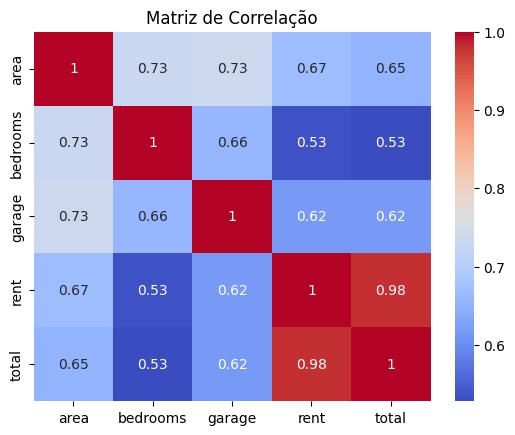

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#Modelagem de Regressão Linear



* Dividimos os dados em conjuntos de treinamento e teste.
* Inicializamos um modelo de regressão linear.
* Treinamos o modelo com os dados de treinamento.
* Fizemos previsões nos dados de teste e avaliamos o desempenho do modelo usando o erro médio quadrático (MSE).
* Usamos o modelo treinado para fazer uma previsão do preço do aluguel em uma determinada área.


In [ ]:
X = dados[['area', 'bedrooms', 'garage']]  # Exemplo de features, ajuste conforme necessário
y = dados['rent']  # Preço do aluguel é o nosso target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático (MSE):", mse)

# Agora você pode usar o modelo treinado para fazer previsões em novos dados
# Por exemplo, para prever o preço do aluguel em uma determinada área:
area = 80  # Exemplo de área em metros quadrados
bedrooms = 2  # Exemplo de número de quartos
garage = 1  # Exemplo de número de vagas de garagem
predicted_rent = model.predict([[area, bedrooms, garage]])
print("Preço previsto do aluguel:", predicted_rent[0])

Erro médio quadrático (MSE): 3746757.115563998
Preço previsto do aluguel: 3132.588132626993


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   

* Substituímos a feature 'area' pela feature 'district'.
* Convertemos a variável categórica 'district' em variáveis dummy (ou one-hot encoding) para que possa ser utilizada no modelo de regressão linear.
* A previsão agora é feita com base no distrito, número de quartos e número de vagas de garagem fornecidos.



In [ ]:
# Selecionar os distritos desejados
distritos_desejados = ['Vila Mariana', 'Pinheiros', 'Moema', 'Itaim Bibi']  # Por exemplo

# Filtrar o dataframe para incluir apenas os distritos desejados
df = dados[dados['district'].isin(distritos_desejados)]

# Selecionar as features (variáveis independentes) e o target (variável dependente)
X = df[['district', 'bedrooms', 'garage']]  # Distrito é agora uma feature
y = df['rent']  # Preço do aluguel é o nosso target

# Converter a variável categórica 'district' em variáveis dummy (ou one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático (MSE):", mse)


Erro médio quadrático (MSE): 6404786.123776319


In [ ]:
# Agora você pode usar o modelo treinado para fazer previsões em novos dados
# Por exemplo, para prever o preço do aluguel em um determinado distrito:
district = 'Vila Mariana'  # Exemplo de distrito
rooms = 2  # Exemplo de número de quartos
garages = 1  # Exemplo de número de vagas de garagem

# Criar uma entrada com o distrito selecionado e valores de quartos e vagas de garagem
input_data = pd.DataFrame([[rooms, garages]], columns=['bedrooms', 'garage'])

# Converter o distrito em variáveis dummy e adicionar ao dataframe de entrada
input_data = pd.get_dummies(pd.concat([input_data, pd.Series([district], name='district')], axis=1), drop_first=True)

# Adicionar features dummy ausentes do conjunto de treinamento
for col in X_train.columns.difference(input_data.columns):
    input_data[col] = 0

# Reordenar as features na mesma ordem do conjunto de treinamento
input_data = input_data[X_train.columns]

# Fazer a previsão do preço do aluguel
predicted_rent = model.predict(input_data)
print("Preço previsto do aluguel em", district, ":", predicted_rent[0])

Preço previsto do aluguel em Vila Mariana : 6128.887490289186


In [ ]:
# Média por distrito
media_por_distrito = dados.groupby('district')['rent'].mean()

# Contagem de imóveis por tipo
contagem_por_tipo = dados['type'].value_counts()

print("\nMédia de Aluguel por Distrito: ", media_por_distrito)
print("\nContagem de Imóveis por Tipo: ", contagem_por_tipo)



Média de Aluguel por Distrito:  district
Aclimação                                                  2810.260000
Adalgisa                                                   7275.500000
Agua Branca                                                2435.000000
Alphaville                                                11247.458333
Alphaville Centro Industrial E Empresarial/alphaville.     6300.000000
                                                              ...     
Várzea da Barra Funda                                      3608.909091
Água Branca                                                3774.045455
Água Fria                                                  3721.800000
Água Funda                                                 3000.000000
Água Rasa                                                  2845.894737
Name: rent, Length: 1199, dtype: float64

Contagem de Imóveis por Tipo:  type
Apartamento           7187
Casa                  2841
Studio e Kitnet       1388
Casa em condomínio

# Gráficos e análises de tendências

## Variação de preços por distrito

<ipython-input-658-2c1398f6bca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aluguel_por_distrito.values, y=aluguel_por_distrito.index, palette='Blues_d')


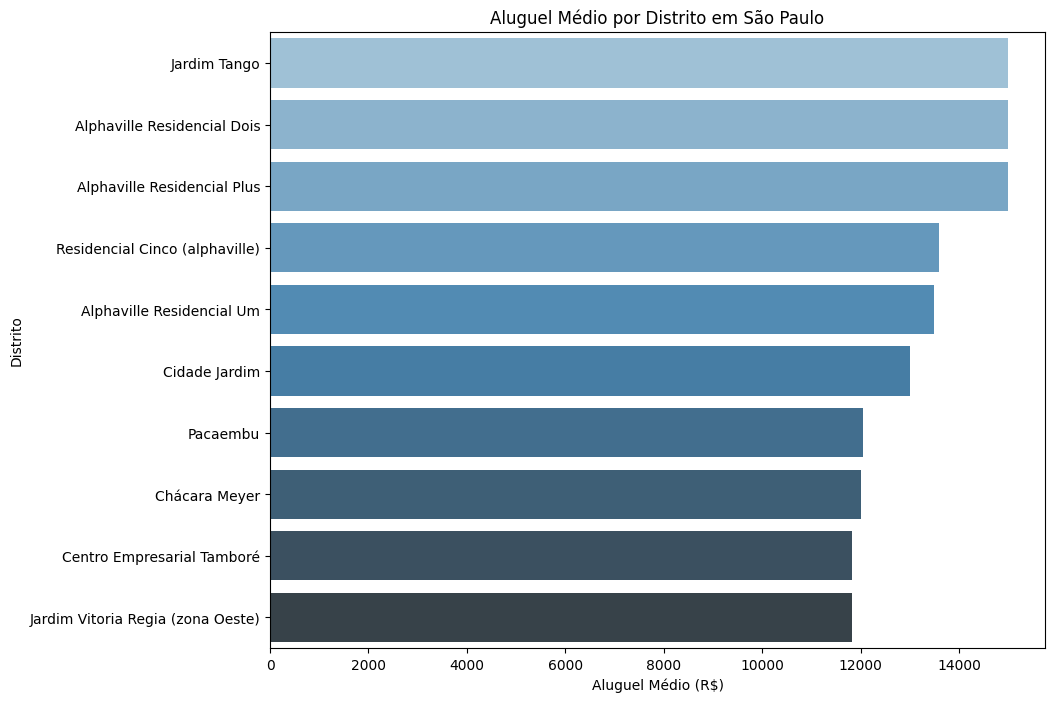

In [ ]:
aluguel_por_distrito = dados.groupby('district')['rent'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=aluguel_por_distrito.values, y=aluguel_por_distrito.index, palette='Blues_d')
plt.xlabel('Aluguel Médio (R$)')
plt.ylabel('Distrito')
plt.title('Aluguel Médio por Distrito em São Paulo')
plt.show()

## Impacto do tipo de imóvel no preço

<ipython-input-649-3e5e43c3979f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aluguel_por_tipo.values, y=aluguel_por_tipo.index, palette='husl')


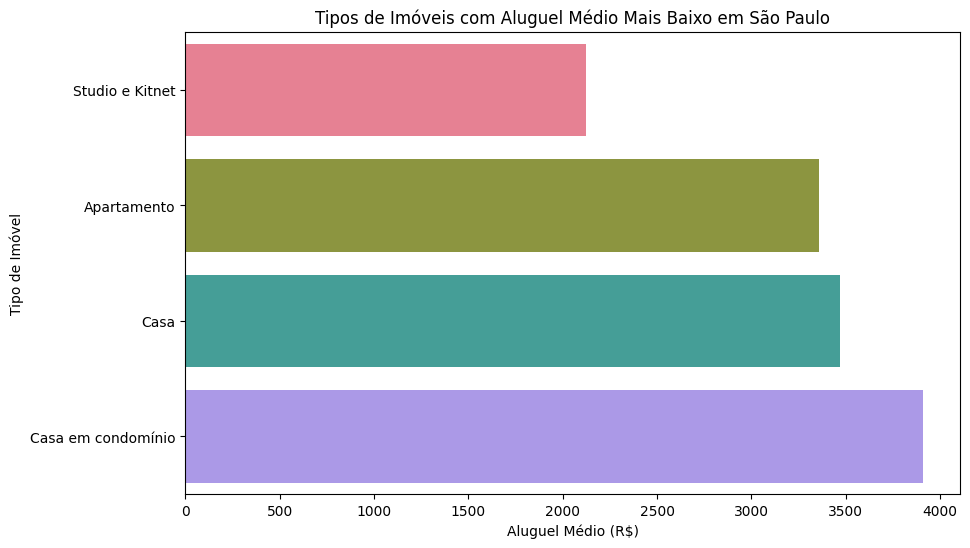

In [ ]:
aluguel_por_tipo = dados.groupby('type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=aluguel_por_tipo.values, y=aluguel_por_tipo.index, palette='husl')
plt.xlabel('Aluguel Médio (R$)')
plt.ylabel('Tipo de Imóvel')
plt.title('Tipos de Imóveis com Aluguel Médio Mais Baixo em São Paulo')
plt.show()

<ipython-input-650-d84babcf01f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aluguel_por_tipo.values, y=aluguel_por_tipo.index, palette='flare')


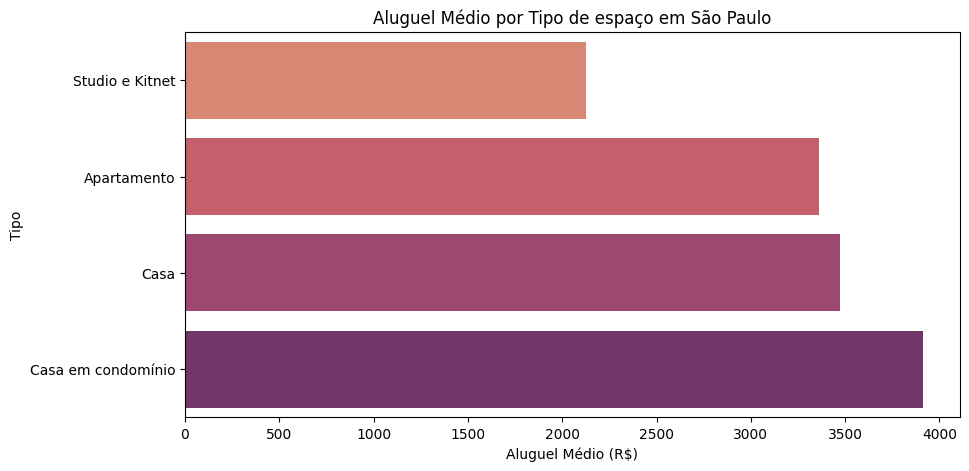

In [ ]:

# Criar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=aluguel_por_tipo.values, y=aluguel_por_tipo.index, palette='flare')
plt.title('Aluguel Médio por Tipo de espaço em São Paulo')
plt.xlabel('Aluguel Médio (R$)')
plt.ylabel('Tipo')


plt.show()

## Análise de segmentação de mercado

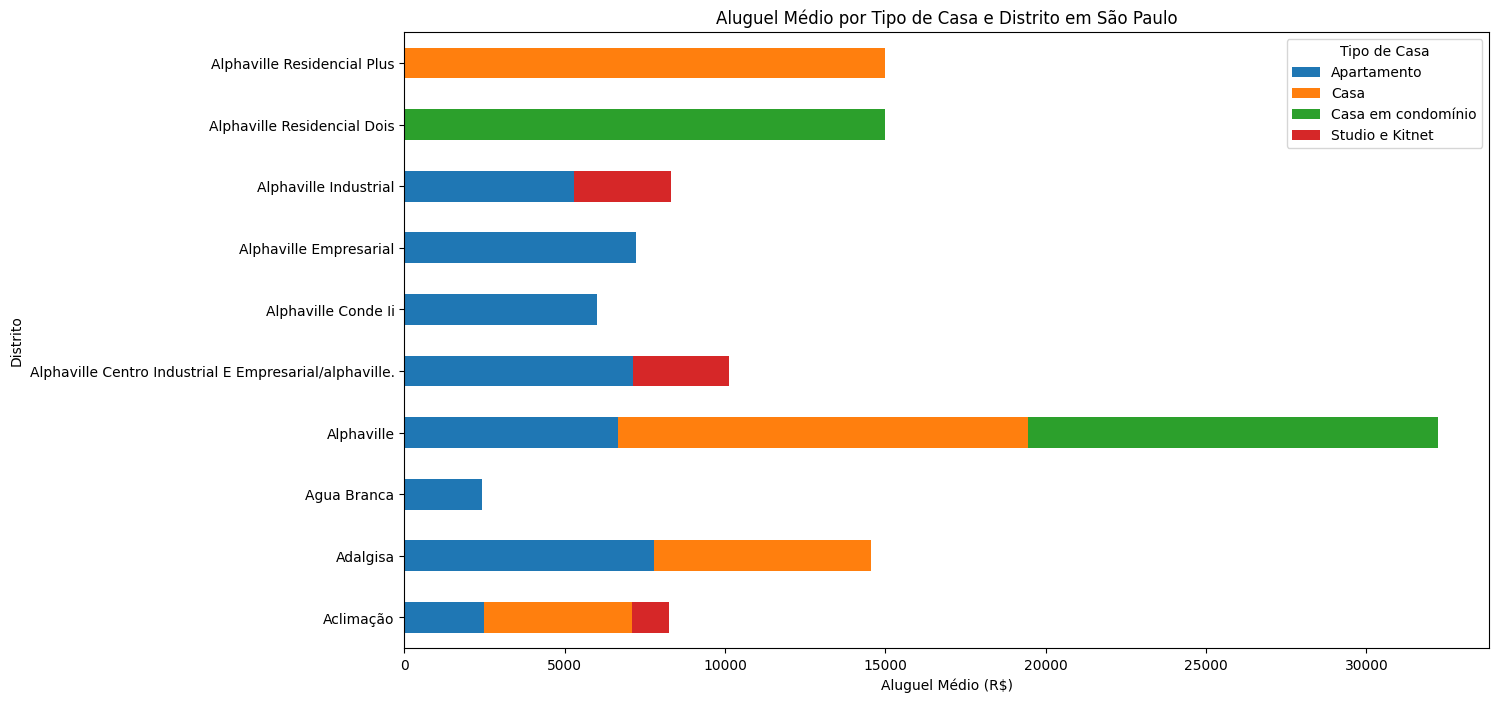

In [ ]:
aluguel_tipo_distrito = dados.groupby(['district', 'type'])['rent'].mean().unstack().head(10)

ax = aluguel_tipo_distrito.plot(kind='barh', figsize=(14, 8), stacked=True)

plt.title('Aluguel Médio por Tipo de Casa e Distrito em São Paulo')
plt.xlabel('Aluguel Médio (R$)')
plt.ylabel('Distrito')
plt.legend(title='Tipo de Casa')
plt.show()

## Variação de preços por distrito

<ipython-input-652-dd0a65eacdec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aluguel_por_distrito.values, y=aluguel_por_distrito.index, palette='viridis')


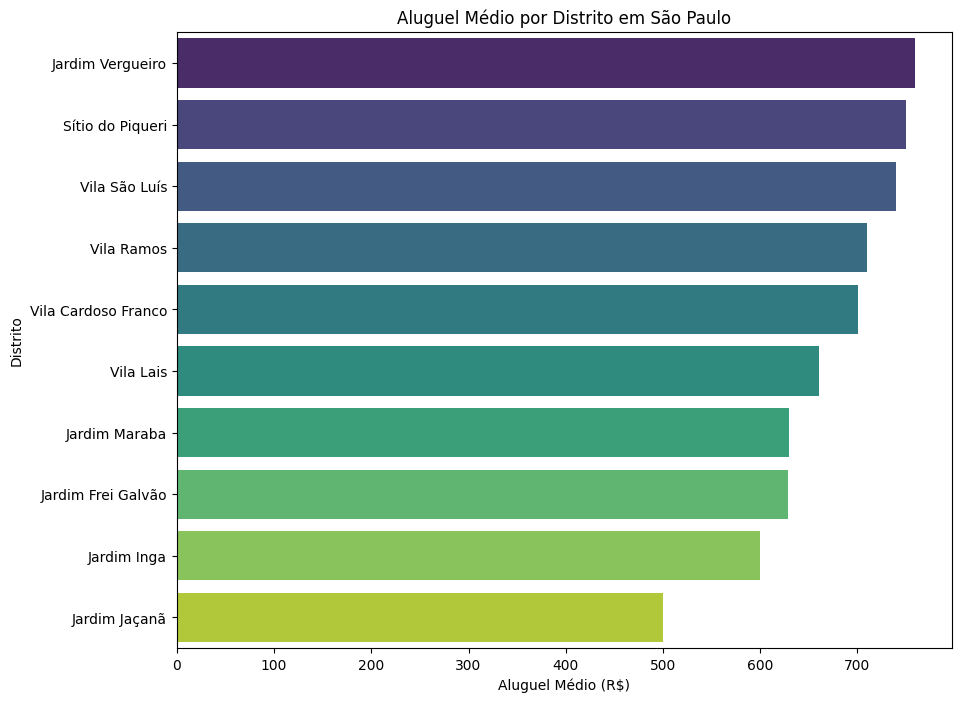

In [ ]:
# Plotar um gráfico de barras horizontais mostrando o aluguel médio por distrito

aluguel_por_distrito = dados.groupby('district')['rent'].mean().sort_values(ascending=True).head(10)
aluguel_por_distrito = aluguel_por_distrito[::-1]

plt.figure(figsize=(10, 8))
sns.barplot(x=aluguel_por_distrito.values, y=aluguel_por_distrito.index, palette='viridis')
plt.xlabel('Aluguel Médio (R$)')
plt.ylabel('Distrito')
plt.title('Aluguel Médio por Distrito em São Paulo')
plt.show()


#Relatório de Análise de Dados de Aluguel em São Paulo
##Introdução

Este relatório apresenta uma análise dos dados de aluguel de imóveis em São Paulo, com foco no preço médio do aluguel por distrito, tipo de imóvel e sua interação. O objetivo é fornecer insights valiosos para proprietários, locatários e profissionais do mercado imobiliário.

##Análise Descritiva

Iniciamos nossa análise com uma exploração descritiva dos dados, calculando estatísticas básicas e identificando tendências. Algumas das conclusões incluem:

    * O preço médio do aluguel por distrito varia significativamente, tendo entre os mais caros, 6 distritos que ultrapassam  a média de 12k e os 10 mais baratos não ultrapassando 800.
    * Tipos de imóveis diferentes têm aluguéis médios distintos, com studios/kitnets geralmente sendo mais baratos do que apartamentos e casas.

##Análise por Distrito

Ao analisar o preço médio do aluguel por distrito, observamos que:

    Os distritos mais caros incluem [Jardim Tango, Alphaville Residencial Dois, Alphaville Residencial Plus, Residencial Cinco(Alphaville), Alphaville Residencial Um].
    Os distritos mais baratos incluem [Jardim Jaçana, Jardim Ingá, Jardim Frei Galvão, Jardim marabá, Vila Laís].

##Análise por Tipo de Imóvel

Quanto à análise por tipo de imóvel, constatamos que:

    Studios/kits tendem a ser mais baratos do que apartamentos e casas em todos os distritos analisados.
    Apartamentos são os imóveis mais comuns em todos os distritos, seguidos por casas e studios/kitnets.

##Segmentação de Mercado

Ao segmentar o mercado por distrito e tipo de imóvel, identificamos padrões interessantes:
    Para um imóvel de, por exmplo, área 80 metros, 2 quartos e 1 garagem o preço previsto seria de mais 3k.
    Dependendo desses parâmetros o previsibilidade mudaria.

##Conclusões e Recomendações

Com base em nossa análise, concluímos que:

    O mercado de aluguel em São Paulo é diversificado e oferece oportunidades para diferentes perfis de locatários e investidores.
    Proprietários podem ajustar suas estratégias de precificação com base nas características do distrito e tipo de imóvel.
    Locatários devem considerar suas necessidades e preferências pessoais ao escolher um imóvel para alugar.

Recomendamos que os interessados no mercado imobiliário em São Paulo continuem monitorando as tendências do mercado e adaptem suas estratégias conforme necessário.